## 1. Entregable.
Los trabajos deben tener los siguientes componentes básicos.

### 1.1 Título del trabajo.
> Debe describir el trabajo.

### 1.2 Objetivos.
> - Se refieren a los propósitos por los cuales se hace el trabajo.
> - Deben ser **concretos, evaluables y verificables.**
> - Deben ser escritos en infinitivo.
> #### 1.1 Objetivo general.
>  - Fin último de estudio. Se formula atendiendo el propósito global del trabajo. No presenta detalles.
>  - Se orienta a la totalidad del trabajo. Tiene que ver con el título del trabajo.
> #### 1.2 Objetivos específicos
>  - De forma detallada describen cada una de los componentes del trabajo.
>  - En conjunto garantizan la consecución del objetivo general.

Referencia:
- https://es.slideshare.net/rosbur/metodologia-objetivos-generales-y-especficos

### 1.3 Definición del problema.
> Se debe describir en una cuartilla máximo cuál es el escenario de negocio que se va a modelar, identificar cuáles son los supuestos que defines en el negocio y cuáles son los "nodos" o "escenarios" que identificas necesarios simular y porqué. Debes elaborar un diagrama de inicio a fin, identificando los "nodos" o "escenarios" a simular.

### 1.4 Nodos y variables que se decidieron simular y porqué
> En este apartado el objetivo es identificar los problemas que se van a abordar, para examinar la factibilidad y viabilidad de la simulación de los nodos escogidos. Posteriormente se debe de argumentar del porqué de los nodos escogidos.

### 1.5 Definición de hipótesis y supuestos.
>  Para poder modelar un proceso de negocio o cualquiera otro proceso en el área de las ingenierías o ciencias sociales, después de identificar el objeto de estudio, es importante indicar cuales son los supuestos que se dan por verdaderos a lo largo de la ejecución del proceso. Estos supuestos se deben indicar en forma de variables e hipótesis (son diferentes), porque si puedes definir en un valor el supuesto lo llamaremos "supuesto constante" y si no es posible identificarlo con un número entonces será una hipótesis que afectará la construcción de los escenarios posibles del proceso.

### 1.6 Obtención de bases de datos
> El tercer paso del proyecto es indicar de dónde se obtendrán las bases de datos, que indican como se han comportado las variables que identificaste en tu proceso de negocio que vas a simular. En esta investigación debes haber encontrado información propia de la empresa, organización o institución que vas a simular y otra parte de la información debe provenir de investigación que realices en fuentes de información públicas o privadas como las que tiene SECOBI, ahí normalmente y dependiendo del problema elegido, se investigan variables económicas, como tasas de interés, inflación, tipo de cambio, etc., de varios años, por poner un ejemplo.

In [69]:
import pandas as pd
import numpy as np
from functools import reduce
import time
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from scipy import optimize

In [78]:

data2021=pd.read_csv('E0.csv')
data2021.set_index('Date',inplace=True)
data1920=pd.read_csv('E0 (4).csv')
data1920.set_index('Date',inplace=True)
data1819=pd.read_csv('E0 (3).csv')
data1819.set_index('Date',inplace=True)
data1718=pd.read_csv('E0 (2).csv')
data1718.set_index('Date',inplace=True)
data1617=pd.read_csv('E0 (1).csv')
data1617.set_index('Date',inplace=True)
data = data1617.append(data1718).append(data1819)
data2 = data1920.append(data2021)
data.to_csv('Data.csv')

In [82]:
cheh = data[data['HomeTeam'] == 'Chelsea' ]
cheh1 = data2[data2['HomeTeam'] == 'Chelsea' ]
cheh = cheh.append(cheh1)
chea = data[data['AwayTeam'] == 'Chelsea' ]#primer nodo

Mch = data[data['HomeTeam'] == 'Manchester City' ]
Mca = data[data['AwayTeam'] == 'Manchester City' ]#segundo nodo

Muh = data[data['HomeTeam'] == 'Manchester United' ]
Mua = data[data['AwayTeam'] == 'Manchester United' ]#Tercer nodo

livh = data[data['HomeTeam'] == 'Liverpool' ]
liva = data[data['AwayTeam'] == 'Liverpool' ]#Cuarto nodo
cheh['B365H']

Date
15/08/16      1.65
27/08/16      1.25
16/09/16      2.25
15/10/16      1.57
23/10/16      2.15
              ... 
27/01/2021    1.60
31/01/2021    1.33
15/02/2021    1.22
28/02/2021    2.15
08/03/2021    1.53
Name: B365H, Length: 90, dtype: float64

90

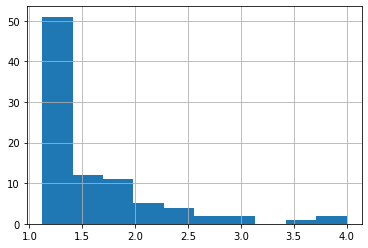

In [83]:
cheh['B365H'].hist()
len(cheh['B365H'])